In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import h5py
import torch
import torch.nn.functional as F

In [ ]:
class NN(torch.nn.Module):
  def __init__(self, in_feat):
    super().__init__()
    self.l1 = torch.nn.Linear(in_feat, 20)
    self.a1 = torch.nn.ReLU()
    self.l2 = torch.nn.Linear(20, 7)
    self.a2 = torch.nn.ReLU()
    self.l3 = torch.nn.Linear(7,5)
    self.a3 = torch.nn.ReLU()
    self.l4 = torch.nn.Linear(5,1)
    self.a4 = torch.nn.Sigmoid()

  def forward(self, X):
    ao1 = self.a1(self.l1(X))
    ao2 = self.a2(self.l2(ao1))
    ao3 = self.a3(self.l3(ao2))
    ao4 = self.a4(self.l4(ao3))

    return ao4

In [ ]:
def load_dataset():
    train = h5py.File("/content/train_catvsnoncat.h5", "r")
    test = h5py.File("/content/test_catvsnoncat.h5", "r")


    train_x = torch.tensor(train['train_set_x'], dtype=torch.float32)
    train_y = torch.tensor(train['train_set_y'], dtype=torch.float32).reshape(1,-1)

    test_x = torch.tensor(test['test_set_x'], dtype=torch.float32)
    test_y = torch.tensor(test['test_set_y'], dtype=torch.float32).reshape(1, -1)

    original_x = np.array(train['train_set_x'])
    return train_x, train_y, test_x, test_y, original_x

X, Y, test_x, test_y, o_x = load_dataset()
print(X.shape)
print(Y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([209, 64, 64, 3])
torch.Size([1, 209])
torch.Size([50, 64, 64, 3])
torch.Size([1, 50])


In [ ]:
m = X.shape[0] # no of training examples
train_x = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
train_x = train_x/255.

In [ ]:

nx = train_x.shape[1]
nx

12288

In [ ]:
model = NN(nx)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0075)


In [ ]:
for i in range(3000):
    optimizer.zero_grad()
    yhat = model(train_x)
    cost = F.binary_cross_entropy(yhat,Y.T)
    cost.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"iteration {i} and cost {cost}")

iteration 0 and cost 0.7853679060935974
iteration 100 and cost 0.4218031167984009
iteration 200 and cost 0.8642398715019226
iteration 300 and cost 0.2459094375371933
iteration 400 and cost 0.11459866166114807
iteration 500 and cost 0.03772614151239395
iteration 600 and cost 0.030415859073400497
iteration 700 and cost 0.027119247242808342
iteration 800 and cost 0.024395769461989403
iteration 900 and cost 0.021918775513768196
iteration 1000 and cost 0.0197684895247221
iteration 1100 and cost 0.017708314582705498
iteration 1200 and cost 0.01581791415810585
iteration 1300 and cost 0.014139768667519093
iteration 1400 and cost 0.012719077989459038
iteration 1500 and cost 0.011343307793140411
iteration 1600 and cost 0.010106848552823067
iteration 1700 and cost 0.009100798517465591
iteration 1800 and cost 0.00813792273402214
iteration 1900 and cost 0.007321694865822792
iteration 2000 and cost 0.006601931527256966
iteration 2100 and cost 0.005967769771814346
iteration 2200 and cost 0.0054074572

In [ ]:
import matplotlib.pyplot as plt
def show_dataset(x, y, rows=6, cols=6):
    fig, axs = plt.subplots(rows, cols, figsize=(7,7))
    for i, ax in enumerate(axs.flat):
        ax.imshow(x[i])
        ax.text(0.5, -0.1, f"is cat: {y[0][i]}", va='bottom')
        ax.axis("off")



In [ ]:
X.shape

torch.Size([209, 64, 64, 3])

In [ ]:
def classify(preds):
    preds[preds > 0.5] = 1
    preds[preds <= 0.5] = 0
    return preds

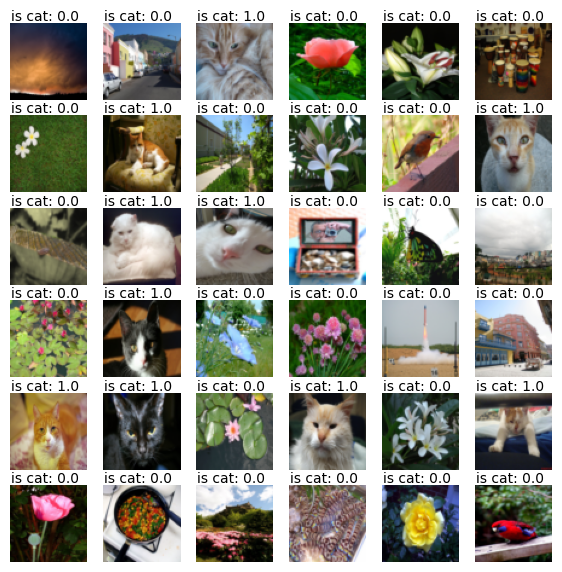

In [ ]:
preds = model(train_x)
preds = classify(preds)
show_dataset(o_x, preds.T)